In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("SILKYSKY_DATA_CW2.csv", encoding='latin1')

In [5]:
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [6]:
data.shape

(103904, 27)

In [8]:
# Male Female count
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender
Female    52727
Male      51177
Name: count, dtype: int64


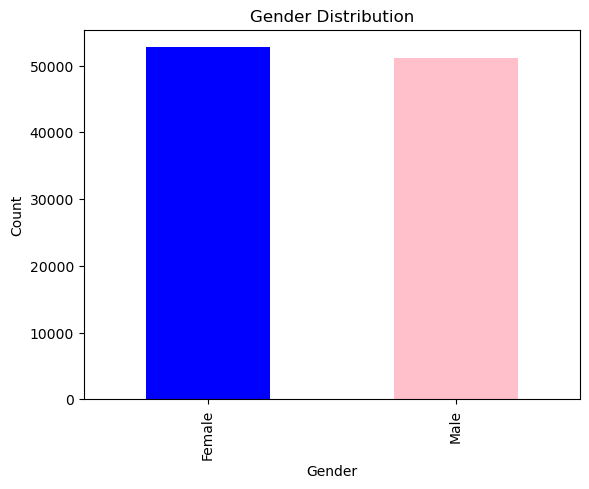

In [13]:
# Plot Bar Chart
# Create a bar chart
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [14]:
data.Satisfied.value_counts()

Satisfied
Y    84920
N    18984
Name: count, dtype: int64

In [17]:
satisfied_male = data[(data['Gender'] == 'Male') & (data['Satisfied'] == 'Y')]
satisfied_female = data[(data['Gender'] == 'Female') & (data['Satisfied'] == 'Y')]

In [20]:
print(f'Satisfied Male: {satisfied_male.shape[0]}')
print(f'Satisfied Female: {satisfied_female.shape[0]}')

Satisfied Male: 42463
Satisfied Female: 42457


In [26]:
satisfaction_gender_counts = data.groupby(['Gender', 'Satisfied']).size().unstack(fill_value=0)
satisfaction_gender_counts

Satisfied,N,Y
Gender,,
Female,10270,42457
Male,8714,42463


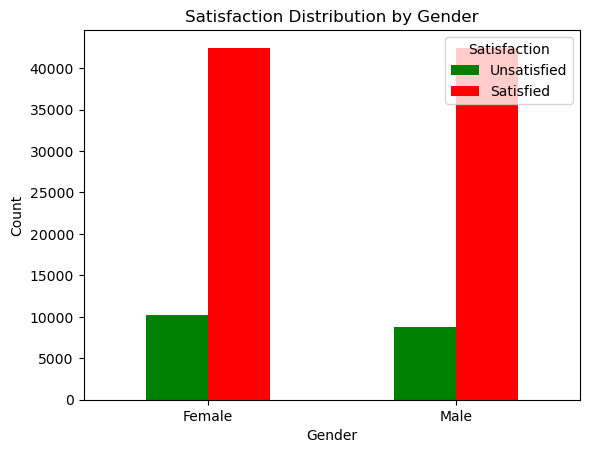

In [27]:
# Plot the bar chart
satisfaction_gender_counts.plot(kind='bar', color=['green', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Satisfaction Distribution by Gender')

# Show the plot
plt.xticks(rotation=0)
plt.legend(title='Satisfaction', labels=['Unsatisfied', 'Satisfied'])
plt.show()

In [28]:
male_counts = satisfaction_gender_counts.loc['Male']
female_counts = satisfaction_gender_counts.loc['Female']

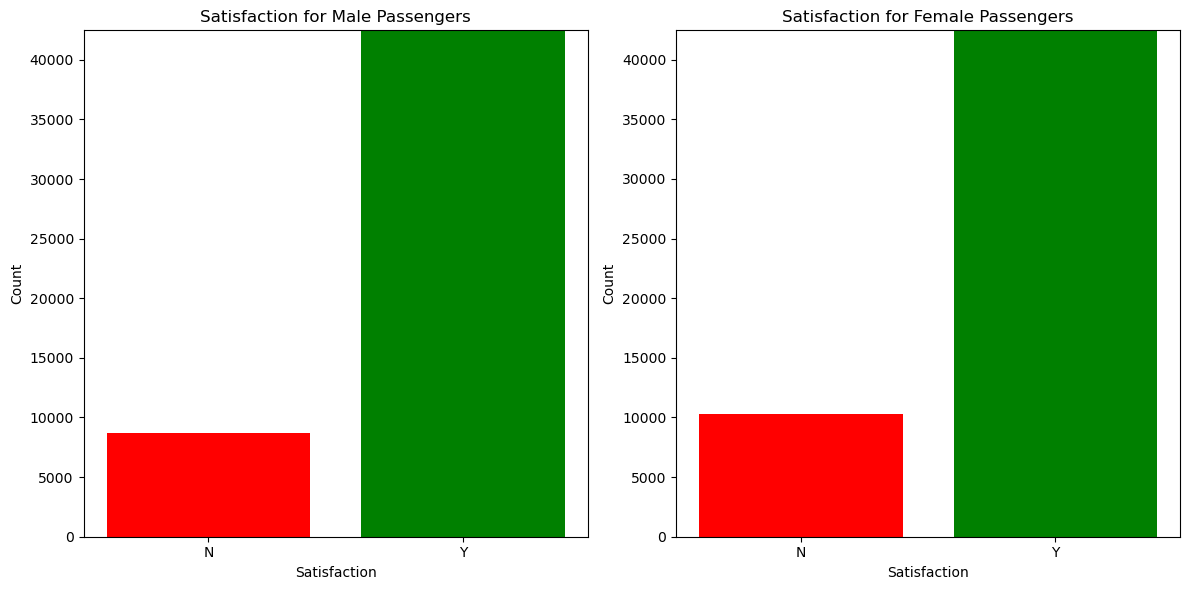

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Male
axes[0].bar(male_counts.index, male_counts.values, color=['red', 'green'])
axes[0].set_title('Satisfaction for Male Passengers')
axes[0].set_xlabel('Satisfaction')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, male_counts.max() + 10)

# Plot for Female
axes[1].bar(female_counts.index, female_counts.values, color=['red', 'green'])
axes[1].set_title('Satisfaction for Female Passengers')
axes[1].set_xlabel('Satisfaction')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, female_counts.max() + 10)

# Show the plots
plt.tight_layout()
plt.show()

In [33]:
data.isna().sum()

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness     

In [34]:
# Assuing there would be no Arrival Delay in Minutes where there is na
data['Arrival Delay in Minutes'].fillna(0, inplace=True)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_8828\1139909978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(0, inplace=True)


In [35]:
data.isna().sum()

Ref                                  0
id                                   0
Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Destination                          0
Continent                            0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minute

In [37]:
data['Age Band'].unique()

array(['Under 18', '25 to 34', '55 to 64', '45 to 54', '35 to 44',
       '18 to 24', '65 or over'], dtype=object)

In [38]:
data['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [39]:
data['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [40]:
data['Destination'].unique()

array(['India', 'Republic of Ireland', 'Norway', 'Italy', 'San Marino',
       'Japan', 'Vatican City', 'Egypt', 'United Kingdom', 'Switzerland',
       'Svalbard', 'Cyprus', 'Croatia', 'Kosovo', 'California', 'Greece',
       'Slovenia', 'Iceland', 'Spain', 'Lithuania', 'France', 'Hong Kong',
       'São Tomé and Príncipe', 'Guinea', 'Jamaica', 'Portugal', 'Togo',
       'Tunisia', 'Moldova', 'Malta', 'Netherlands', 'Luxembourg',
       'Uzbekistan', 'Latvia', 'Chad', 'Belgium', 'Estonia', 'Poland',
       'Jersey', 'Syria', 'Germany', 'Republic of the Congo', 'Mauritius',
       'United Arab Emirates', 'Romania', 'Greenland', 'Turkey',
       'Denmark', 'Palestinian National Authority', 'Pakistan',
       'Guernsey', 'Morocco', 'Serbia', 'Sweden', 'Saudi Arabia',
       'Nigeria', 'Ghana', 'Liechtenstein', 'Kuwait', 'Saint Lucia',
       'Jordan', 'North Macedonia', 'Kyrgyzstan', 'Alabama', 'Iraq',
       'Israel', 'Yemen', 'Turkmenistan', 'Bosnia and Herzegovina',
       'Benin', 'R

In [78]:
type_of_travel_gender_count = data.groupby(['Gender', 'Type of Travel']).size().unstack(fill_value=0)
type_of_travel_gender_count

Type of Travel,Business travel,Personal Travel
Gender,,
Female,36528,16199
Male,35127,16050


In [52]:
satisfaction_gender_counts

Satisfied,N,Y
Gender,,
Female,10270,42457
Male,8714,42463


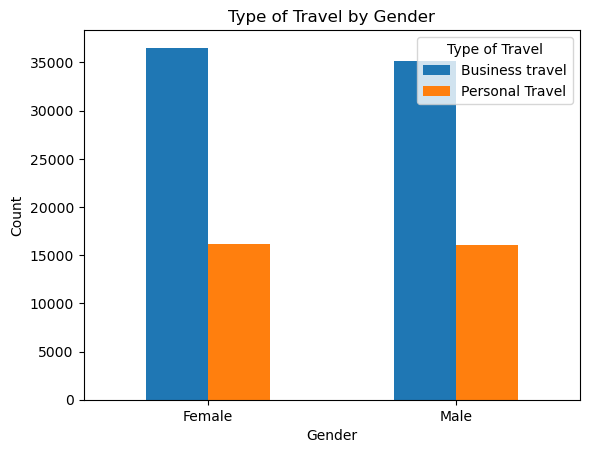

In [55]:
type_of_travel_gender_count.plot(kind='bar')
plt.ylabel('Count')
plt.title('Type of Travel by Gender')
plt.xticks(rotation=0)
plt.legend(title='Type of Travel', labels=type_of_travel_gender_count.columns)
plt.show()

In [56]:
data.sample()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
41699,41699,112030,Male,Y,38,35 to 44,Personal Travel,Eco,680,France,...,3,3,4,2,4,3,4,3,0,0.0


C:\Users\zeesh\AppData\Local\Temp\ipykernel_8828\692928955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='Set2', order=data['Gender'].value_counts().index)


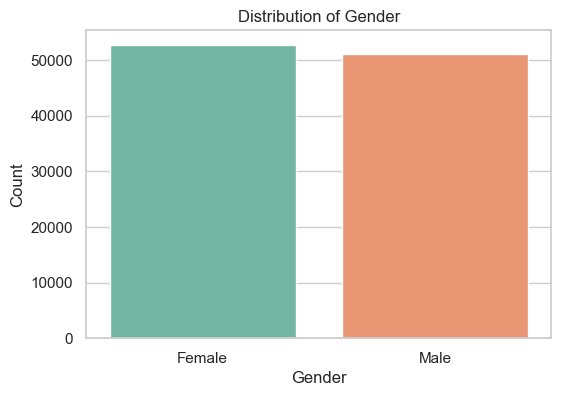

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set(style="whitegrid")

# Plot Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', palette='Set2', order=data['Gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<Axes: >

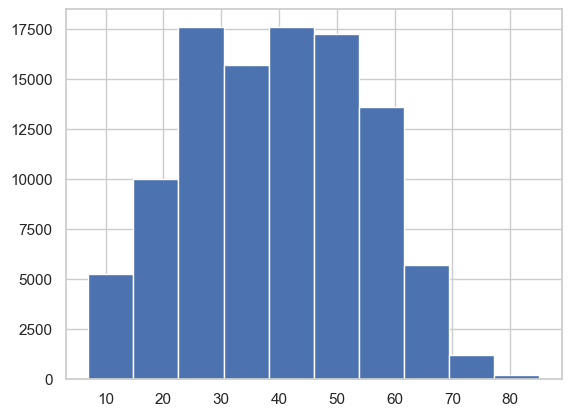

In [58]:
data['Age'].hist()


<Axes: >

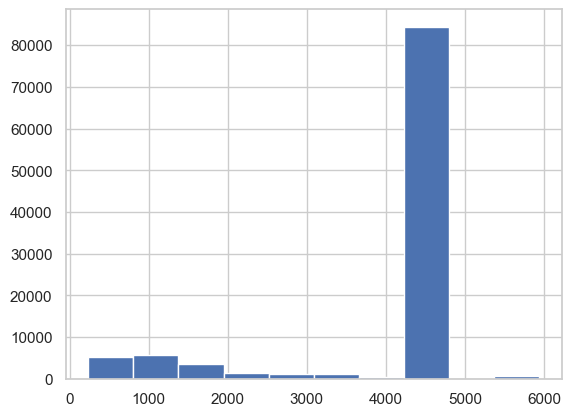

In [59]:
data['Flight Distance'].hist()

<Axes: >

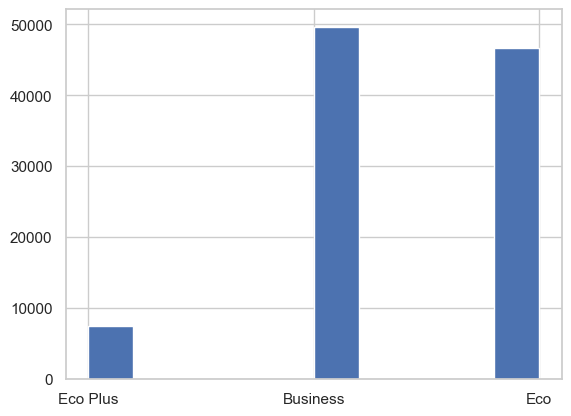

In [60]:
data.Class.hist()

<Axes: >

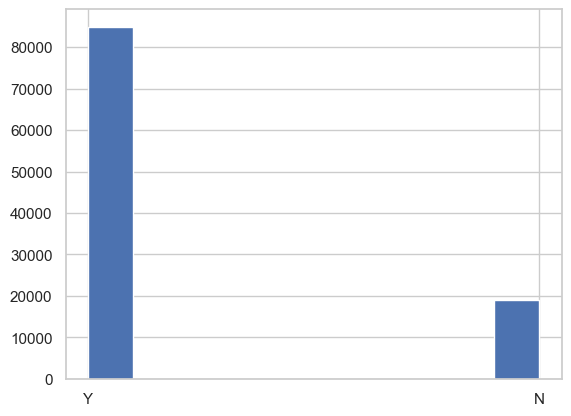

In [63]:
data.Satisfied.hist()

#### Bivariate Analysis (Two Variables)
  - Satisfaction vs Gender
  - Satisfaction vs Age Band
  - Satisfaction vs Flight Distance (boxplot)
  - Satisfaction vs Class
  - Satisfaction vs Type of Travel

<Axes: xlabel='Satisfied', ylabel='Gender'>

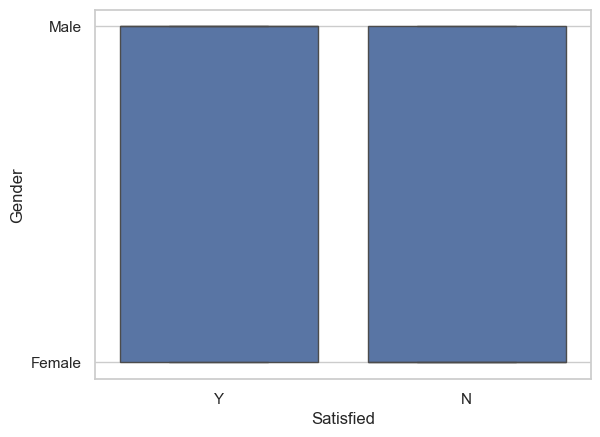

In [64]:
sns.boxplot(x='Satisfied', y='Gender', data=data)

<Axes: xlabel='Satisfied', ylabel='Age Band'>

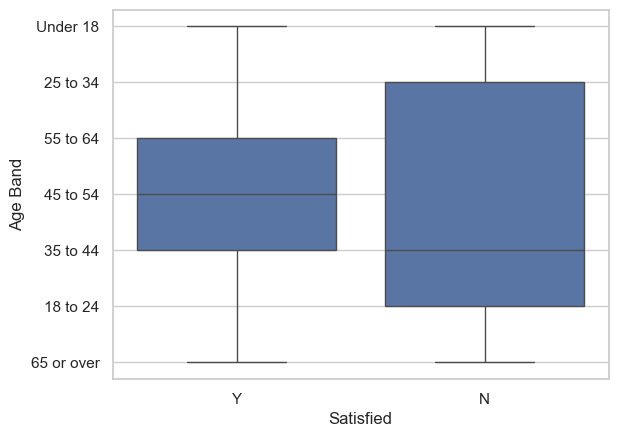

In [65]:
sns.boxplot(x='Satisfied', y='Age Band', data=data)

<Axes: xlabel='Satisfied', ylabel='Flight Distance'>

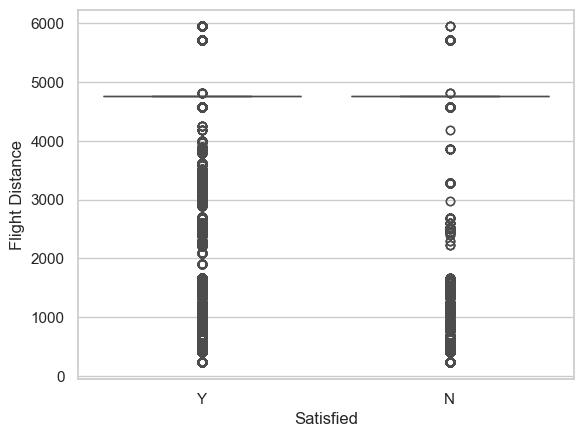

In [66]:
sns.boxplot(x='Satisfied', y='Flight Distance', data=data)

<Axes: xlabel='Satisfied', ylabel='Class'>

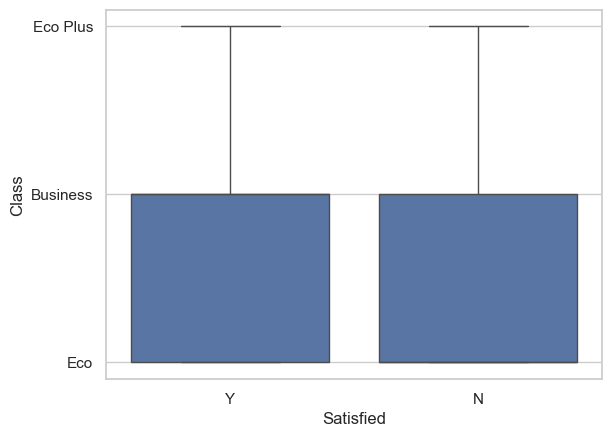

In [67]:
sns.boxplot(x='Satisfied', y='Class', data=data)

<Axes: xlabel='Satisfied', ylabel='Type of Travel'>

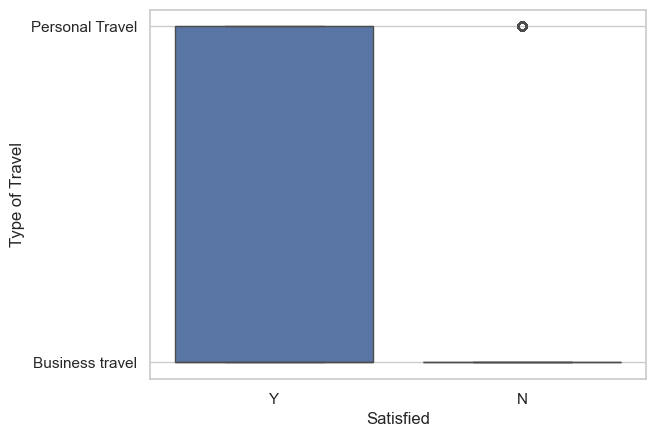

In [68]:
sns.boxplot(x='Satisfied', y='Type of Travel', data=data)

In [69]:
data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [70]:
data.columns

Index(['Ref', 'id', 'Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel',
       'Class', 'Flight Distance', 'Destination', 'Continent',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

In [74]:
data['Inflight wifi service']

0         3
1         0
2         2
3         2
4         3
         ..
103899    2
103900    4
103901    0
103902    1
103903    1
Name: Inflight wifi service, Length: 103904, dtype: int64

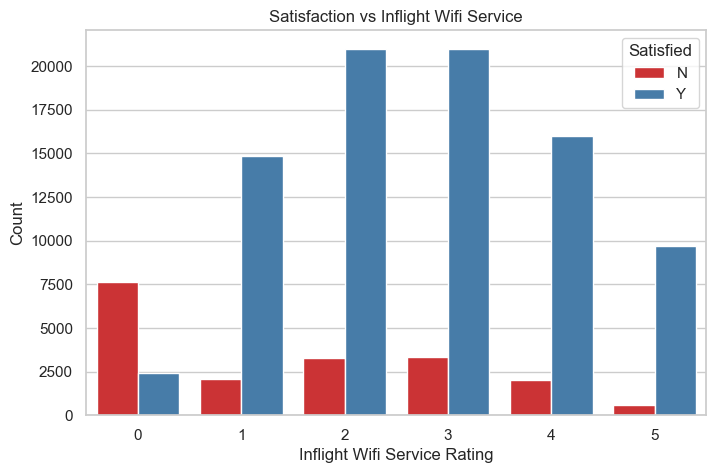

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Inflight wifi service', hue='Satisfied', palette='Set1')
plt.title('Satisfaction vs Inflight Wifi Service')
plt.xlabel('Inflight Wifi Service Rating')
plt.ylabel('Count')
plt.legend(title='Satisfied')
plt.show()

### Grouped Analysis of Services by Satisfied

In [81]:
service_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

mean_ratings_by_satisfaction = data.groupby('Satisfied')[service_columns].mean()
mean_ratings_by_satisfaction

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Satisfied,,,,,,,,,,,,,,
N,1.573483,2.392594,2.698746,2.992836,3.034450,2.709703,2.980668,3.047724,3.227718,3.217341,3.693005,3.217657,3.696218,3.053782
Y,2.734432,3.209503,2.769842,2.973245,3.239484,3.371090,3.492110,3.427449,3.416792,3.380794,3.618005,3.323528,3.627838,3.338212


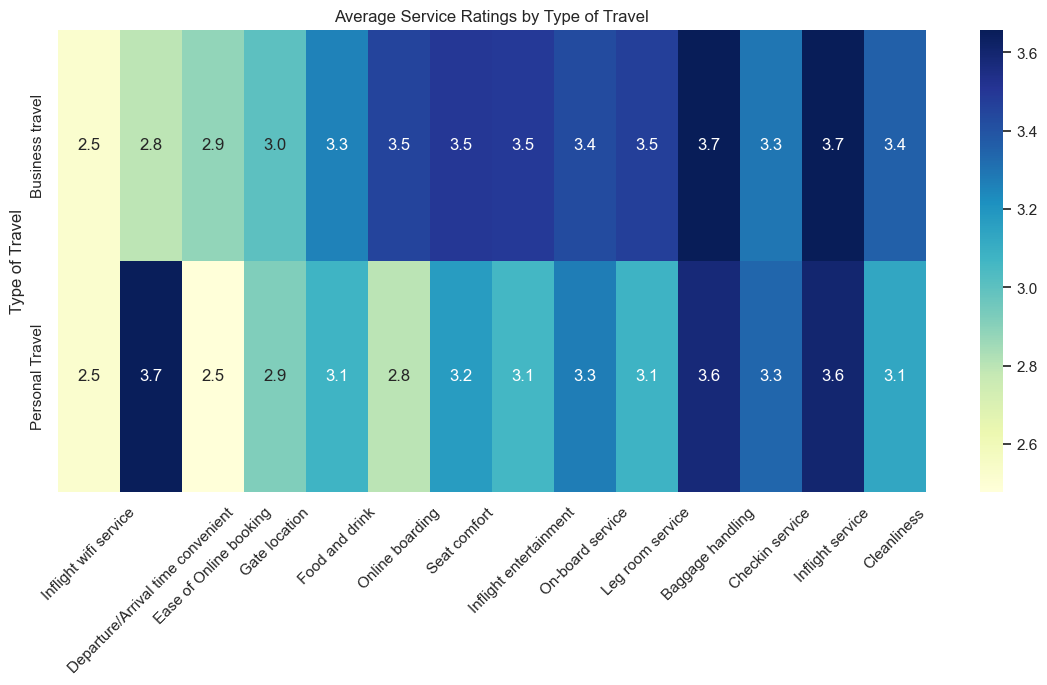

In [82]:
mean_scores_by_travel = data.groupby('Type of Travel')[service_columns].mean()

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(mean_scores_by_travel, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Service Ratings by Type of Travel')
plt.ylabel('Type of Travel')
plt.xticks(rotation=45)
plt.show()

In [84]:
# Group by Class and Continent, calculate mean delays
delay_data = data.groupby(['Class', 'Continent'])[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].mean().round(1)
delay_data

Departure Delay in Minutes  \
Class    Continent                                           
Business Africa                                       13.1   
         Asia                                         14.5   
         Europe                                       14.7   
         Europe/Asia (Eurasia)                         8.6   
         North America                                12.2   
         South America                                13.5   
Eco      Africa                                       11.3   
         Asia                                         15.2   
         Europe                                       15.2   
         North America                                15.2   
         South America                                 8.1   
Eco Plus Africa                                       10.0   
         Asia                                         15.7   
         Europe                                       14.8   
         North America                                12.1   
         South America                                 4.8   

                                Arrival Delay in Minutes  
Class    Continent                                        
Business Africa                                     13.1  
         Asia                                       14.5  
         Europe                                     15.2  
         Europe/Asia (Eurasia)                       7.5  
         North America                              12.6  
         South America                              18.2  
Eco      Africa                                     12.0  
         Asia                                       15.6  
         Europe                                     16.0  
         North America                              16.0  
         South America                               5.1  
Eco Plus Africa                                     10.2  
         Asia                                       16.2  
         Europe                                     15.8  
         North America                              12.8  
         South America                               3.5

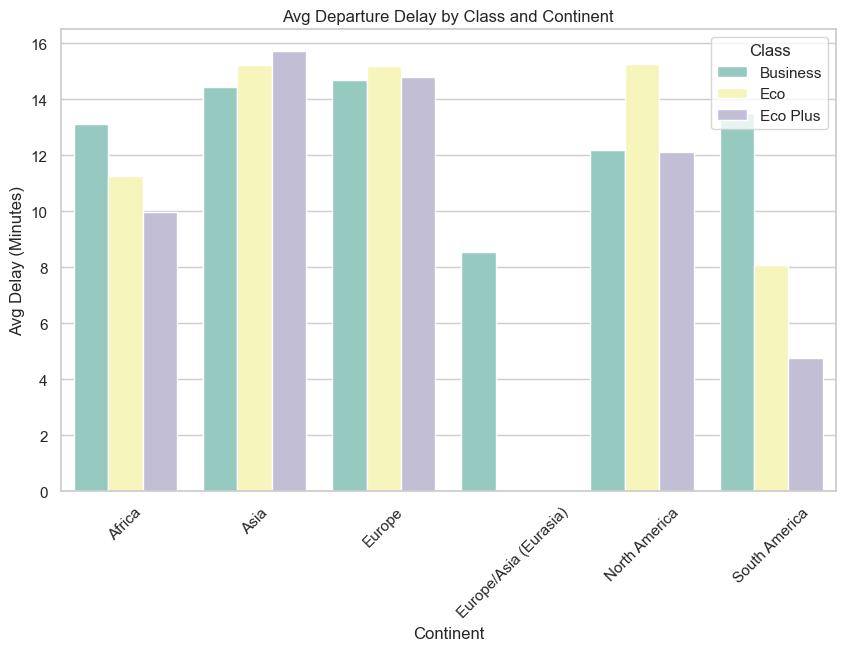

In [85]:
delay_data_plot = data.groupby(['Class', 'Continent'])['Departure Delay in Minutes'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=delay_data_plot, x='Continent', y='Departure Delay in Minutes', hue='Class', palette='Set3')
plt.title('Avg Departure Delay by Class and Continent')
plt.ylabel('Avg Delay (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()
